##Hello!
This is a code to extract tweets, process data and make a sentimental analysis in order to evalue impressions about Samsung, iPhone and Xiaomi. It uses tweepy to search and collect the tweets, functions to prepare data and textblob and wordcloud to proceed with sentimental analysis.

Please note that API limit for retrieving data is max 100 tweets

#1. Import libraries and authentication

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import re
import nltk
import tweepy as tw
import csv
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#API twitter authentication

key = 'KEY'
secret = 'SECRET'
token = 'TOKEN'
acess_token = 'ACCESS_TOKEN'
acess_secret = 'ACCESS_SECRET'

autentication = tw.OAuthHandler(key, secret)
autentication.set_access_token(acess_token, acess_secret)

twitter = tw.API(autentication)

#2. Extracting tweets about Xiaomi Redmi using the 3 arguments available for result_type parameter

In [ ]:
# Extact 100 tweets with "popular" as result_type argument for Xiaomi
tweets = twitter.search(q='xiaomi redmi', count=100, lang = 'en', max_id=-1, tweet_mode='extended',result_type='popular')

#  Print the last 3 tweets
print("Show the 3 recent tweets:\n")
i=1
for tweet in tweets[:3]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 3 recent tweets:

1) Mi Fans! These are challenging times &amp; you shouldn't be worried about your phone warranty expiry.

We are happy to offer #warranty extension of your #Mi #Redmi devices by 2 months, if your warranty is lapsing in May or June. ✌

#StayHome #StaySafe and relax. 😷

I ❤️ Mi #Xiaomi https://t.co/9uI2nHBmX7



In [ ]:
#Extracting 100 more tweets setting result_type = recent, and plus 100 setting result_type = mixed
tweets2 = twitter.search(q='xiaomi redmi', count=100, lang = 'en', max_id=-1, tweet_mode='extended',result_type='recent')
tweets3 = tweets = twitter.search(q='xiaomi redmi', count=100, lang = 'en', max_id=-1, tweet_mode='extended',result_type='mixed')

In [ ]:
# Creating 3 dataframes using collected data
df1 = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
df2 = pd.DataFrame([tweet.full_text for tweet in tweets2], columns=['Tweets'])
df3 = pd.DataFrame([tweet.full_text for tweet in tweets3], columns=['Tweets'])

#3 dataframes in one
data = pd.concat([df1, df2, df3])
data.head()

,Tweets
0,Mi Fans! These are challenging times &amp; you...
1,RT @pointekonline: Are you ready to be among t...
2,@Xiaomi Technology launches 5G smartphones for...
3,RT @ReviewerCritic: @Xiaomi Technology launche...
4,@Xiaomi Technology launches 5G smartphones for...


#3. Data clean and sentimental analysis of Xiaomi

In [ ]:
#Function do clean caracters and words related to Xiaomi from tweet

def cleanTweet(tweet):
    tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
    tweet = re.sub('#', '', tweet)
    tweet = re.sub('RT','', tweet)
    tweet = re.sub('https','',tweet)
    tweet = re.sub('xiaomi', '', tweet)
    tweet = re.sub('redmi', '', tweet)
    tweet = re.sub('Xiaomi', '', tweet)
    tweet = re.sub('Redmi', '', tweet)

    return tweet

# Cleaning tweets
data['Tweets'] = data['Tweets'].apply(cleanTweet)

In [ ]:
# Dropping duplicates (some of them were results of two or more searches)
data.drop_duplicates()
data

,Tweets
0,Mi Fans! These are challenging times &amp; you...
1,: Are you ready to be among the lucky winner ...
2,Technology launches 5G smartphones for the UA...
3,: Technology launches 5G smartphones for the...
4,Technology launches 5G smartphones for the UA...
...,...
95,Pattern Printing PU Leather Flip Stand Phone C...
96,": Note 10 series (5G, Chinese variants) comi..."
97,Plated Mirror Surface View Window Leather Stan...
98,: Are you ready to be among the lucky winner ...


In [ ]:
#Function to identify subjectivity and polarity of tweets (using textblob)

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [ ]:
#applying the functions on tweets about Xiaomi

data['Subjectivity'] = data['Tweets'].apply(getSubjectivity)
data['Polarity'] = data['Tweets'].apply(getPolarity)

data.head()

,Tweets,Subjectivity,Polarity
0,Mi Fans! These are challenging times &amp; you...,1.000000,0.650000
1,: Are you ready to be among the lucky winner ...,0.666667,0.266667
2,Technology launches 5G smartphones for the UA...,0.000000,0.000000
3,: Technology launches 5G smartphones for the...,0.000000,0.000000
4,Technology launches 5G smartphones for the UA...,0.000000,0.000000


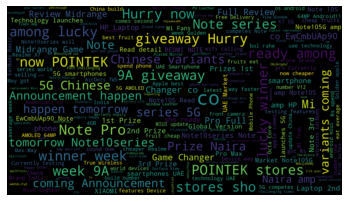

In [ ]:
#Creating wordcloud to observe the most common words used in tweets related to Xiaomi

from wordcloud import WordCloud

allWords = ' '.join([tweets for tweets in data['Tweets']])
wordCloud = WordCloud(width=1920, height=1080, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Function to attirbute values of tweets analysis:valores negative (-1), neutral (0) and positive (+1)

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

#aplicando a função

data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,Tweets,Subjectivity,Polarity,Analysis
0,Mi Fans! These are challenging times &amp; you...,1.000000,0.650000,Positive
1,: Are you ready to be among the lucky winner ...,0.666667,0.266667,Positive
2,Technology launches 5G smartphones for the UA...,0.000000,0.000000,Neutral
3,: Technology launches 5G smartphones for the...,0.000000,0.000000,Neutral
4,Technology launches 5G smartphones for the UA...,0.000000,0.000000,Neutral
...,...,...,...,...
95,Pattern Printing PU Leather Flip Stand Phone C...,1.000000,0.250000,Positive
96,": Note 10 series (5G, Chinese variants) comi...",0.000000,0.000000,Neutral
97,Plated Mirror Surface View Window Leather Stan...,0.375000,-0.125000,Negative
98,: Are you ready to be among the lucky winner ...,0.666667,0.266667,Positive


In [ ]:
# Percentage of positive and negative tweets

#positive

ptweets = data[data.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets
round( (ptweets.shape[0] / data.shape[0]) * 100 , 1)

44.7

In [ ]:
#negative:
ntweets = data[data.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / data.shape[0]) * 100, 1)

15.0

In [ ]:
#Value counts of analysis

data['Analysis'].value_counts()

Positive    134
Neutral     121
Negative     45
Name: Analysis, dtype: int64

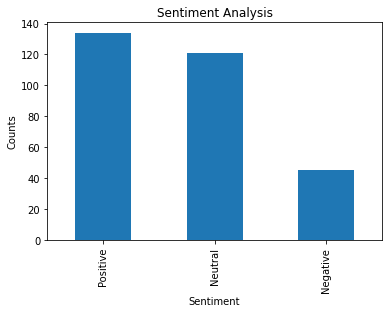

In [ ]:
#Plotting the sentiment analysis

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

It is possible to note from the sentimental tweet analysis about Xiaomi that there is a greate positive and expecting "buzz" related to the Redmi Note announcement. Some of marketing campaingns on twitter and other social media can be elaborated in order to impulse this expecting and keep the target audicence curious but also excited about the upcoming news. Maybe reveal some details can be effective to promote this kind of audience reaction and attention.

#4. Doing the same for iPhone and Samsung tweets

In [ ]:
# Extracting 100 tweets about iPhone
tweets_iphone = twitter.search(q='iPhone', count=100, lang = 'en', max_id=-1, tweet_mode='extended',result_type='popular')

#  Print the last 3 tweets
print("Show the 3 recent tweets:\n")
i=1
for tweet in tweets_iphone [:3]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 3 recent tweets:

1) NEW: The NY Attorney General is now conducting a *criminal* investigation into Trump Org’s financial practices, in addition to its civil probe.

Also, the NY AG seems to working w/the Manhattan DA, as 2 long-running probes of Trump seem to be sharing info.
https://t.co/iAK1eXITTk

2) Years since they were released:

iPhone 14 years
Kindle 14 years
iPod 20 years
Xbox 20 years
BlackBerry 22 years
TiVo 22 years
PalmPilot 24 years
DVD 25 years
Game Boy 32 years
Mac 37 years
NES 38 years
IBM PC 40 years 
Sony Walkman 42 years
VCR 46 years
Polaroid camera 74 years

3) iPhone needs to make a feature when you can listen to your music in the car while talking on the phone at the same time



In [ ]:
#Extracting 100 more tweets setting result_type = recent, and plus 100 setting result_type = mixed

tweets_iphone2 = twitter.search(q='iPhone', count=100, lang = 'en', max_id=-1, tweet_mode='extended',result_type='recent')
tweets_iphone3 = tweets = twitter.search(q='iPhone', count=100, lang = 'en', max_id=-1, tweet_mode='extended',result_type='mixed')

In [ ]:
# Creating the dataframe
df4 = pd.DataFrame([tweet.full_text for tweet in tweets_iphone], columns=['Tweets'])
df5 = pd.DataFrame([tweet.full_text for tweet in tweets_iphone2], columns=['Tweets'])
df6 = pd.DataFrame([tweet.full_text for tweet in tweets_iphone3], columns=['Tweets'])

data_iphone = pd.concat([df4, df5, df6])
data_iphone.head()

,Tweets
0,NEW: The NY Attorney General is now conducting...
1,Years since they were released:\n\niPhone 14 y...
2,iPhone needs to make a feature when you can li...
3,Epic Lawyer to @pschiller: “You’re very famili...
4,Do more with a double-tap or a triple-tap on t...


In [ ]:
# Cleaning tweets

def cleanTweetIphone(tweet):
    tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
    tweet = re.sub('#', '', tweet)
    tweet = re.sub('RT','', tweet)
    tweet = re.sub('https','',tweet)
    tweet = re.sub('iphone', '', tweet)
    tweet = re.sub('iPhone', '', tweet)


    return tweet

data_iphone['Tweets'] = data_iphone['Tweets'].apply(cleanTweetIphone)


In [ ]:
# Dropping duplicates
data_iphone.drop_duplicates()
data_iphone

,Tweets
0,NEW: The NY Attorney General is now conducting...
1,Years since they were released:\n\n 14 years\n...
2,needs to make a feature when you can listen t...
3,Epic Lawyer to : “You’re very familiar with th...
4,Do more with a double-tap or a triple-tap on t...
...,...
95,"troyhunt posted ""Apple rolls out a slew of new..."
96,"Esports GG | 12 Pro or $1,000 Giveaway ://t.c..."
97,1 Iphone FiukLiveAmericanas
98,8 !


In [ ]:
#Applying subjectivity and polarity functions

data_iphone['Subjectivity'] = data_iphone['Tweets'].apply(getSubjectivity)
data_iphone['Polarity'] = data_iphone['Tweets'].apply(getPolarity)

data_iphone.head()

,Tweets,Subjectivity,Polarity
0,NEW: The NY Attorney General is now conducting...,0.376136,-0.053409
1,Years since they were released:\n\n 14 years\n...,0.400000,-0.400000
2,needs to make a feature when you can listen t...,0.125000,0.000000
3,Epic Lawyer to : “You’re very familiar with th...,0.525000,0.293750
4,Do more with a double-tap or a triple-tap on t...,0.250000,0.250000


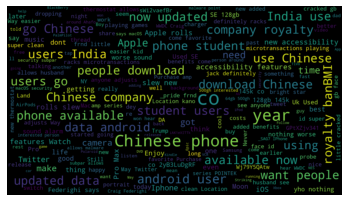

In [ ]:
#Wordcloud

from wordcloud import WordCloud

allWords = ' '.join([tweets for tweets in data_iphone['Tweets']])
wordCloud = WordCloud(width=1920, height=1080, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
data_iphone['Analysis'] = data_iphone['Polarity'].apply(getAnalysis)

# Show the dataframe
data_iphone

,Tweets,Subjectivity,Polarity,Analysis
0,NEW: The NY Attorney General is now conducting...,0.376136,-0.053409,Negative
1,Years since they were released:\n\n 14 years\n...,0.400000,-0.400000,Negative
2,needs to make a feature when you can listen t...,0.125000,0.000000,Neutral
3,Epic Lawyer to : “You’re very familiar with th...,0.525000,0.293750,Positive
4,Do more with a double-tap or a triple-tap on t...,0.250000,0.250000,Positive
...,...,...,...,...
95,"troyhunt posted ""Apple rolls out a slew of new...",0.563636,0.340341,Positive
96,"Esports GG | 12 Pro or $1,000 Giveaway ://t.c...",0.000000,0.000000,Neutral
97,1 Iphone FiukLiveAmericanas,0.000000,0.000000,Neutral
98,8 !,0.000000,0.000000,Neutral


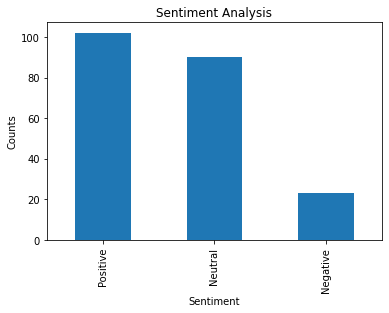

In [ ]:
#Plotting sentiment analysis

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data_iphone['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# Extraindo 100 tweets about Samsung Galaxy
tweets_samsung = twitter.search(q='samsung galaxy', count=100, lang = 'en', max_id=1, tweet_mode='extended',result_type='popular')

#  Print the last 3 tweets
print("Show the 3 recent tweets:\n")
i=1
for tweet in tweets_samsung [:3]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 3 recent tweets:

1) BTS had fans swooning when they appeared in an ad for Samsung's Galaxy Buds Live Wireless Earbuds -- and now they're on sale. https://t.co/H1KSaR7VvI

2) We're giving away a Samsung Galaxy S21 5G! 🎁 

The winner will be announced on June 1 🤞 

Follow the link below for more info and your chance to win 👇 
https://t.co/kGdBk0PPQ8

3) No deal beats this one! Visit any of the Samsung shops nearby, buy a Galaxy S21+ or S21 Ultra and get a Galaxy Tab A8 for FREE! 

Hurry, this promo ends on 31st May, don't miss out! https://t.co/gYnksqmYL4



In [ ]:
# #Extracting 100 more tweets setting result_type = recent, and plus 100 setting result_type = mixed

tweets_samsung2 = twitter.search(q='samsung galaxy', count=100, lang = 'en', max_id=1, tweet_mode='extended',result_type='recent')
tweets_samsung3 = tweets = twitter.search(q='samsung galaxy', count=100, lang = 'en', max_id=1, tweet_mode='extended',result_type='mixed')

In [ ]:
# Creating dataframe

df7 = pd.DataFrame([tweet.full_text for tweet in tweets_samsung], columns=['Tweets'])
df8 = pd.DataFrame([tweet.full_text for tweet in tweets_samsung2], columns=['Tweets'])
df9 = pd.DataFrame([tweet.full_text for tweet in tweets_samsung3], columns=['Tweets'])

data_samsung = pd.concat([df7, df8, df9])
data_samsung.drop_duplicates()

,Tweets
0,BTS had fans swooning when they appeared in an...
1,We're giving away a Samsung Galaxy S21 5G! 🎁 \...
2,No deal beats this one! Visit any of the Samsu...
3,Samsung makes it official: 2021 Galaxy Watch w...
4,Here are more reasons to fall in love with the...
5,Make everyday moments epic with the #GalaxyS21...
6,What if we told you that the monsoon can no lo...
7,Here’s another chance to win a Bell Samsung Ga...
8,Samsung drops a special edition Galaxy S21 5G ...
9,Google and Samsung are teaming up on a joint s...


In [ ]:
#Cleaning tweets

def cleanTweetSamsung(tweet):
    tweet = re.sub('@[A-Za-z0–9]+', '', tweet)
    tweet = re.sub('#', '', tweet)
    tweet = re.sub('RT','', tweet)
    tweet = re.sub('https','',tweet)
    tweet = re.sub('samsung', '', tweet)
    tweet = re.sub('Samsung', '', tweet)
    tweet = re.sub('galaxy', '', tweet)
    tweet = re.sub('Galaxy', '', tweet)


    return tweet

data_samsung['Tweets'] = data_samsung['Tweets'].apply(cleanTweetSamsung)


In [ ]:
#Dropping duplicates
data_samsung.drop_duplicates()
data_samsung

,Tweets
0,BTS had fans swooning when they appeared in an...
1,We're giving away a S21 5G! 🎁 \n\nThe winner...
2,No deal beats this one! Visit any of the shop...
3,makes it official: 2021 Watch will run Wear ...
4,Here are more reasons to fall in love with the...
...,...
95,Note 20 Ultra Whitestone Dome Glass and Camera...
96,: BTS had fans swooning when they appeared in...
97,: BTS had fans swooning when they appeared in...
98,": WIN a A52 5G 📱🎁\n\nTo enter, tell us how ..."


In [ ]:
#Applying subjectivity and polarity functions

data_samsung['Subjectivity'] = data_samsung['Tweets'].apply(getSubjectivity)
data_samsung['Polarity'] = data_samsung['Tweets'].apply(getPolarity)

data_samsung.head()

,Tweets,Subjectivity,Polarity
0,BTS had fans swooning when they appeared in an...,0.50,0.136364
1,We're giving away a S21 5G! 🎁 \n\nThe winner...,0.45,0.650000
2,No deal beats this one! Visit any of the shop...,0.80,0.625000
3,makes it official: 2021 Watch will run Wear ...,0.00,0.000000
4,Here are more reasons to fall in love with the...,0.50,0.600000


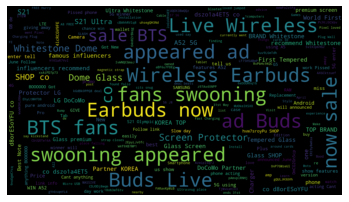

In [ ]:
#Wordcloud
from wordcloud import WordCloud

allWords = ' '.join([tweets for tweets in data_samsung['Tweets']])
wordCloud = WordCloud(width=1920, height=1080, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
data_samsung['Analysis'] = data_samsung['Polarity'].apply(getAnalysis)
# Show the dataframe
data_samsung

,Tweets,Subjectivity,Polarity,Analysis
0,BTS had fans swooning when they appeared in an...,0.500000,0.136364,Positive
1,We're giving away a S21 5G! 🎁 \n\nThe winner...,0.450000,0.650000,Positive
2,No deal beats this one! Visit any of the shop...,0.800000,0.625000,Positive
3,makes it official: 2021 Watch will run Wear ...,0.000000,0.000000,Neutral
4,Here are more reasons to fall in love with the...,0.500000,0.600000,Positive
...,...,...,...,...
95,Note 20 Ultra Whitestone Dome Glass and Camera...,0.416667,0.375000,Positive
96,: BTS had fans swooning when they appeared in...,0.500000,0.136364,Positive
97,: BTS had fans swooning when they appeared in...,0.500000,0.136364,Positive
98,": WIN a A52 5G 📱🎁\n\nTo enter, tell us how ...",0.400000,0.800000,Positive


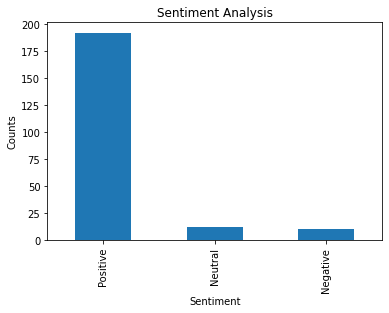

In [ ]:
#Plotting sentiment analysis

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data_samsung['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

With sentimental analysis about direct competing companies of Xiaomi (Samsung and iPhone), it can be noticed that tweets also have a positive trend. However, the wordcloud shows that, in case of iPhone, tweets about accessbility tools are frequent; and in case of Samsung, there is a positive buzz about the airbuds. Therefore it is a good opportunity to invest in marketing campaing that can reinforce the upcomin toosl of next Xiaomi release, and the advantagens over the competitors. Some of ideas: promove comparative challenge, partnership with influencers that make reactions and reviews of electronic products. It is also possible to note the Samsung "sudden buzz" is related to BTS (k-pop band), that appeared in public using Samsung's earbuds, so it's necessary to create some competitve strategy in order to attract attention to Xiaomi's next release and be aware about the next marketing campaigns, impulse partnership with artists and influencers that are next to young audience.